# Staying in Munich: an AirBnB study

## Business unterstanding

I want to dive into AirBnB data in my own hometown, Munich, in order to answer the following questions:

1. How is the overall price level for staying in Munich?
2. What neighborhoods are the most expensive/cheapest?
3. During what time is the trip to Munich most/least expensive?
4. What are the most common amenities  and are they influencing the overall price level?

## Data understanding

For this project I use data collected via http://insideairbnb.com/munich/.
The gathered data consist of the following datasets:
- <b>listings.csv</b>: one listing, meaning one listed accommodation, on Airbnb containing description of the listing, of the neighborhood, the host and the asked price
- <b>reviews.csv</b>: list of reviews containing date of review, reviewed accommodation and review 
- <b>calendar.csv</b>: availability calendar for listings incl. price details for the future 365 days (25.12.2021-24.12.2022) 

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import json
import seaborn as sns

listings = pd.read_csv("listings.csv", index_col="id")
reviews = pd.read_csv("reviews.csv")
calendar = pd.read_csv("calendar.csv")

In [274]:
# get the scrape date
listings.last_scraped.unique()

array(['2021-12-24'], dtype=object)

The dataset containing all listings in Munich was scraped on 24.12.2021 and contains present and past listings and reviews on AirBnB.

The calendar dataset contains predefined prices by listing hosts from 24.12.2021-23.12.2022.

### listings

In [3]:
listings_rows = listings.shape[0]
listings_attr = listings.shape[1]
print("Dataset contains {} rows and {} features.".format(listings_rows,listings_attr))

Dataset contains 4995 rows and 73 features.


In [4]:
listings.head()

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
97945,https://www.airbnb.com/rooms/97945,20211224070709,2021-12-24,Deluxw-Apartm. with roof terrace,"<b>The space</b><br />We offer a modern, quiet...",We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,https://www.airbnb.com/users/show/517685,Angelika,...,4.93,4.78,4.73,NaN,f,2,2,0,0,1.04
114695,https://www.airbnb.com/rooms/114695,20211224070709,2021-12-24,Apartment Munich/East with sundeck,<b>The space</b><br />It´s a quiet and sunny a...,NaN,https://a0.muscache.com/pictures/21571874/960e...,581737,https://www.airbnb.com/users/show/581737,Stephan,...,5.00,4.55,4.60,NaN,f,2,2,0,0,0.42
127383,https://www.airbnb.com/rooms/127383,20211224070709,2021-12-24,City apartment next to Pinakothek,<b>The space</b><br />My cosy apartment is loc...,NaN,https://a0.muscache.com/pictures/79238c11-bc61...,630556,https://www.airbnb.com/users/show/630556,Sonja,...,4.96,4.91,4.82,NaN,f,1,1,0,0,0.79
159634,https://www.airbnb.com/rooms/159634,20211224070709,2021-12-24,"Fancy, bright central roof top flat and homeof...",In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/4203267/08141...,765694,https://www.airbnb.com/users/show/765694,Sanna,...,4.75,4.50,4.34,NaN,f,1,1,0,0,0.27
170154,https://www.airbnb.com/rooms/170154,20211224070709,2021-12-24,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,https://a0.muscache.com/pictures/31636890/593e...,108297,https://www.airbnb.com/users/show/108297,Alex,...,4.98,4.76,4.90,NaN,f,1,0,1,0,3.97


In [5]:
listings.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated',

In [260]:
listings.property_type.value_counts()

Entire rental unit                     2483
Private room in rental unit            1270
Entire condominium (condo)              212
Room in hotel                           151
Entire serviced apartment               141
Private room in residential home        139
Room in boutique hotel                   79
Entire loft                              77
Private room in condominium (condo)      71
Shared room in rental unit               48
Private room in townhouse                46
Entire residential home                  42
Private room in serviced apartment       41
Private room in hostel                   31
Room in serviced apartment               19
Room in aparthotel                       17
Entire townhouse                         13
Private room in loft                     11
Private room in bed and breakfast        11
Camper/RV                                 9
Entire guest suite                        8
Private room in tent                      6
Tiny house                      

In [262]:
most_common_property_types = list(listings.property_type.value_counts().nlargest(5).index)
most_common_property_types 

['Entire rental unit',
 'Private room in rental unit',
 'Entire condominium (condo)',
 'Room in hotel',
 'Entire serviced apartment']

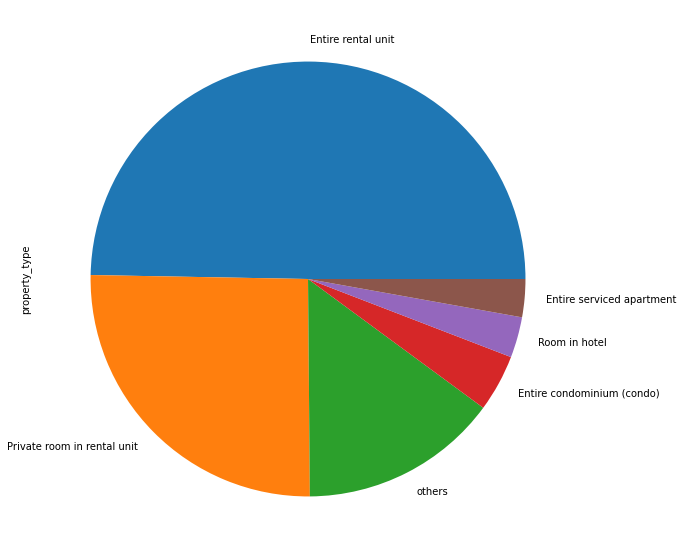

In [269]:
property_types = listings.property_type.copy()
property_types = property_types.apply(lambda x: x if (x in most_common_property_types) else 'others' )
property_types.value_counts().plot.pie(figsize=(10,10))

### calendar

In [6]:
calendar_rows = calendar.shape[0]
calendar_attr = calendar.shape[1]
print("Dataset contains {} rows and {} features.".format(calendar_rows,calendar_attr))

Dataset contains 1822810 rows and 7 features.


In [7]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,701005,2021-12-24,f,$40.00,$40.00,2,1125
1,199840,2021-12-24,f,$59.00,$59.00,1,780
2,199840,2021-12-25,t,$59.00,$59.00,1,780
3,199840,2021-12-26,t,$49.00,$49.00,1,780
4,199840,2021-12-27,t,$49.00,$49.00,1,780


In [8]:
calendar.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

### reviews

In [9]:
reviews_rows = reviews.shape[0]
reviews_attr = reviews.shape[1]
print("Dataset contains {} rows and {} features.".format(reviews_rows,reviews_attr))

Dataset contains 111579 rows and 6 features.


In [10]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,97945,591337,2011-10-03,508190,Lauren,We very much enjoyed staying at Angelika's apa...
1,97945,796084,2011-12-20,341171,Marty & Evelyn,"Angelika was a very gracious host, and went ou..."
2,97945,964528,2012-03-02,1647967,Sue,The apartment was beautiful and Angelika provi...
3,97945,1353862,2012-05-26,2414638,Mel And George,We loved the warm welcome and was pleasantly s...
4,97945,1375610,2012-05-29,2323197,Anais,"Dès notre arrivée, notre hote nous a cordialem..."


In [11]:
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

## Data preparation

### listings

Let's first drop columns with only empty values. These columns do not offer any additional information.

In [12]:
listings.columns[listings.notnull().sum() == 0]

Index(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated',
       'license'],
      dtype='object')

In [13]:
listings_df = listings.drop(columns=listings.columns[listings.notnull().sum() == 0])
listings_df.shape

(4995, 69)

We do not want extensive features on the host in our dataset. Nevertheless I want to keep the "host_id" for the purpose of future indentification.

In [14]:
listings_df = listings_df.drop(columns=['host_url',
       'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
        'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 
       'host_verifications',
       'host_has_profile_pic', 'host_identity_verified'])

In [15]:
listings_df

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_name,host_is_superhost,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
97945,https://www.airbnb.com/rooms/97945,20211224070709,2021-12-24,Deluxw-Apartm. with roof terrace,"<b>The space</b><br />We offer a modern, quiet...",We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,Angelika,t,...,4.90,4.93,4.78,4.73,f,2,2,0,0,1.04
114695,https://www.airbnb.com/rooms/114695,20211224070709,2021-12-24,Apartment Munich/East with sundeck,<b>The space</b><br />It´s a quiet and sunny a...,NaN,https://a0.muscache.com/pictures/21571874/960e...,581737,Stephan,f,...,4.96,5.00,4.55,4.60,f,2,2,0,0,0.42
127383,https://www.airbnb.com/rooms/127383,20211224070709,2021-12-24,City apartment next to Pinakothek,<b>The space</b><br />My cosy apartment is loc...,NaN,https://a0.muscache.com/pictures/79238c11-bc61...,630556,Sonja,f,...,4.98,4.96,4.91,4.82,f,1,1,0,0,0.79
159634,https://www.airbnb.com/rooms/159634,20211224070709,2021-12-24,"Fancy, bright central roof top flat and homeof...",In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/4203267/08141...,765694,Sanna,f,...,4.72,4.75,4.50,4.34,f,1,1,0,0,0.27
170154,https://www.airbnb.com/rooms/170154,20211224070709,2021-12-24,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,https://a0.muscache.com/pictures/31636890/593e...,108297,Alex,t,...,4.99,4.98,4.76,4.90,f,1,0,1,0,3.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53933449,https://www.airbnb.com/rooms/53933449,20211224070709,2021-12-24,"Tiny House ""Holzofen Lodge""",Es ist ein Brunnen mit gutem Wasser und ein St...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,8767947,Reno,f,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
53935376,https://www.airbnb.com/rooms/53935376,20211224070709,2021-12-24,Haus mit Garten im grünen Münchner Westen,Nur 6 Minuten vom Pasinger Marienplatz mit zah...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,22253535,Julia,f,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
53936793,https://www.airbnb.com/rooms/53936793,20211224070709,2021-12-24,Dein neues Zuhause in München -schönes Zimmer,Wir vermieten top ausgestattete Zimmer mit eig...,Sehr ruhige Wohngegend,https://a0.muscache.com/pictures/miso/Hosting-...,434644613,Norbert,f,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN


In [16]:
listings_df.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_name',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
   

In [17]:
listings_df.calculated_host_listings_count.value_counts()

1     3424
2      622
3      204
4      176
5      120
6       96
8       72
7       42
9       36
33      33
28      28
26      26
23      23
11      22
21      21
10      20
18      18
12      12
Name: calculated_host_listings_count, dtype: int64

In [18]:
listings.amenities

id
97945       ["Room-darkening shades", "Long term stays all...
114695      ["Long term stays allowed", "Hangers", "Smoke ...
127383      ["Breakfast", "Hangers", "Smoke alarm", "Coffe...
159634      ["Room-darkening shades", "Long term stays all...
170154      ["Room-darkening shades", "Long term stays all...
                                  ...                        
53933449    ["Carbon monoxide alarm", "Outdoor dining area...
53935376    ["Carbon monoxide alarm", "Indoor fireplace", ...
53936793    ["Room-darkening shades", "Long term stays all...
53945865    ["Children\u2019s dinnerware", "Room-darkening...
53949583    ["Room-darkening shades", "Long term stays all...
Name: amenities, Length: 4995, dtype: object

In [19]:
listings_df.neighbourhood.value_counts(), listings_df.neighbourhood_cleansed.value_counts(), 

(Munich, Bayern, Germany                     2269
 Munich, Bavaria, Germany                     252
 Munich, BY, Germany                          154
 Munich, Germany                                9
 Karlsfeld, Bayern, Germany                     3
 München, Bayern, DE, Bayern, Germany           2
 München Moosach, Bavaria, Germany              1
 Munich, Deutschland, Germany                   1
 Gräfelfing, Bayern, Germany                    1
 Munich  Schwabing-West, Bavaria, Germany       1
 München , Bayern, Germany                      1
 Munich, deutchland, Germany                    1
 München , Bavaria, Germany                     1
 M, Bayern, Germany                             1
 München Nymphenburg , Germany                  1
 Name: neighbourhood, dtype: int64,
 Ludwigsvorstadt-Isarvorstadt                              598
 Maxvorstadt                                               424
 Schwabing-West                                            355
 Au-Haidhausen           

In [20]:
listings_df = listings_df.drop(columns=['scrape_id', 'last_scraped', 'picture_url', 'host_listings_count', 'host_total_listings_count',
       'neighbourhood', 
       'bathrooms_text',
       'bedrooms', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',  'instant_bookable',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'])

In [21]:
listings_df.dtypes

listing_url                        object
name                               object
description                        object
neighborhood_overview              object
host_id                             int64
host_name                          object
host_is_superhost                  object
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
beds                              float64
amenities                          object
price                              object
minimum_nights                      int64
maximum_nights                      int64
minimum_nights_avg_ntm            float64
maximum_nights_avg_ntm            float64
has_availability                   object
availability_30                     int64
availability_60                     int64
availability_90                   

The price is represented as text. We need to format it as floating numbers in order to evaluate price distributions later on.

In [22]:
listings_df.price = listings_df.price.apply(lambda x: x.replace("$","").replace(",","")).astype(float)

In [23]:
listings_df["price_per_person"] = listings_df.price/listings_df.accommodates

In [24]:
listings_df["price_per_person"].describe()

count    4991.000000
mean       50.921961
std       129.502086
min         2.187500
25%        25.000000
50%        36.333333
75%        52.500000
max      4999.500000
Name: price_per_person, dtype: float64

In [25]:
listings_df.head()

,listing_url,name,description,neighborhood_overview,host_id,host_name,host_is_superhost,neighbourhood_cleansed,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,price_per_person
id,,,,,,,,,,,,,,,,,,,,,
97945,https://www.airbnb.com/rooms/97945,Deluxw-Apartm. with roof terrace,"<b>The space</b><br />We offer a modern, quiet...",We are living in a outskirt of Munich its call...,517685,Angelika,t,Hadern,48.11492,11.48954,...,4.84,4.89,4.82,4.90,4.93,4.78,4.73,2,1.04,40.00
114695,https://www.airbnb.com/rooms/114695,Apartment Munich/East with sundeck,<b>The space</b><br />It´s a quiet and sunny a...,NaN,581737,Stephan,f,Berg am Laim,48.12071,11.63758,...,4.77,4.71,4.96,4.96,5.00,4.55,4.60,2,0.42,19.00
127383,https://www.airbnb.com/rooms/127383,City apartment next to Pinakothek,<b>The space</b><br />My cosy apartment is loc...,NaN,630556,Sonja,f,Maxvorstadt,48.15199,11.56482,...,4.86,4.92,4.80,4.98,4.96,4.91,4.82,1,0.79,24.75
159634,https://www.airbnb.com/rooms/159634,"Fancy, bright central roof top flat and homeof...",In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",765694,Sanna,f,Pasing-Obermenzing,48.13855,11.46586,...,4.63,4.75,4.25,4.72,4.75,4.50,4.34,1,0.27,26.00
170154,https://www.airbnb.com/rooms/170154,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,108297,Alex,t,Sendling-Westpark,48.10814,11.52733,...,4.95,4.95,4.98,4.99,4.98,4.76,4.90,1,3.97,13.75


It seems that there are outliers regarding pricing. We will exclude inordinately high prices from the dataset. To be clear, we exclude prices greater that 1.5*IQR (Inter quartile range).

In [26]:
q1 = listings_df["price_per_person"].quantile(.25)
q3 = listings_df["price_per_person"].quantile(.75)
iqr = q3-q1
iqr

27.5

In [27]:
listings_df = listings_df[listings_df["price_per_person"] <= q3+1.5*iqr]

In [28]:
listings_df.price_per_person.describe()

count    4641.000000
mean       38.164593
std        18.074205
min         2.187500
25%        24.750000
50%        35.000000
75%        49.500000
max        93.333333
Name: price_per_person, dtype: float64

In [291]:
listings_df.price.describe()

count    4641.000000
mean       95.533506
std        69.709547
min         9.000000
25%        53.000000
50%        79.000000
75%       114.000000
max       750.000000
Name: price, dtype: float64

### reviews

In [29]:
reviews.shape

(111579, 6)

In [30]:
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         98
dtype: int64

Let us drop all reviews without an actual review.

In [31]:
reviews_df = reviews.dropna(axis=0, how='any')

In [32]:
reviews_df.shape

(111481, 6)

### calendar

In [33]:
calendar[calendar.price != calendar.adjusted_price]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
7213,186596,2021-12-24,f,$85.00,$78.00,1,1125
7214,186596,2021-12-25,f,$85.00,$78.00,1,1125
7215,186596,2021-12-26,f,$85.00,$78.00,1,1125
33053,227106,2022-05-23,t,$75.00,$64.00,2,90
33054,227106,2022-05-24,t,$75.00,$64.00,2,90
...,...,...,...,...,...,...,...
1767609,53379105,2021-12-25,f,$55.00,$52.00,3,180
1803465,53864575,2021-12-24,f,$44.00,$40.00,6,11
1803466,53864575,2021-12-25,f,$44.00,$40.00,6,11
1803467,53864575,2021-12-26,f,$39.00,$35.00,6,11


In [34]:
calendar_df = calendar.drop(columns=["adjusted_price"])

In [35]:
calendar_df.price = calendar_df.price.apply(lambda x: x.replace("$","").replace(",","")).astype(float)

In [36]:
calendar_df.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,701005,2021-12-24,f,40.0,2,1125
1,199840,2021-12-24,f,59.0,1,780
2,199840,2021-12-25,t,59.0,1,780
3,199840,2021-12-26,t,49.0,1,780
4,199840,2021-12-27,t,49.0,1,780


## Analyze

### 1. How is the general price level for staying in Munich?

That should be easy. Let's have a look at the price distrubution of our listings.

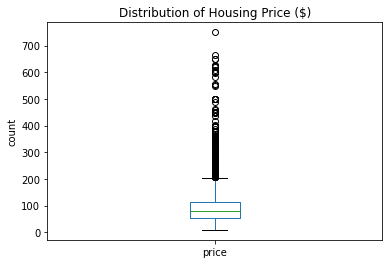

In [290]:
listings_df.price.plot(kind="box", title="Distribution of Housing Price ($)",ylabel="count")

In [37]:
listings_df.price.describe()

count    4641.000000
mean       95.533506
std        69.709547
min         9.000000
25%        53.000000
50%        79.000000
75%       114.000000
max       750.000000
Name: price, dtype: float64

In [38]:
listings_df.price_per_person.describe()

count    4641.000000
mean       38.164593
std        18.074205
min         2.187500
25%        24.750000
50%        35.000000
75%        49.500000
max        93.333333
Name: price_per_person, dtype: float64

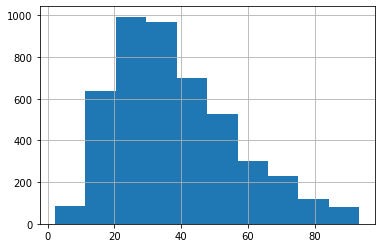

In [39]:
listings_df.price_per_person.hist()

Hm, maybe not as simple as expected. It seems like we are dealing with outliers.

In [40]:
listings_df[listings_df.price_per_person>800][["price","accommodates","price_per_person"]]

,price,accommodates,price_per_person
id,,,


Text(0, 0.5, 'count')

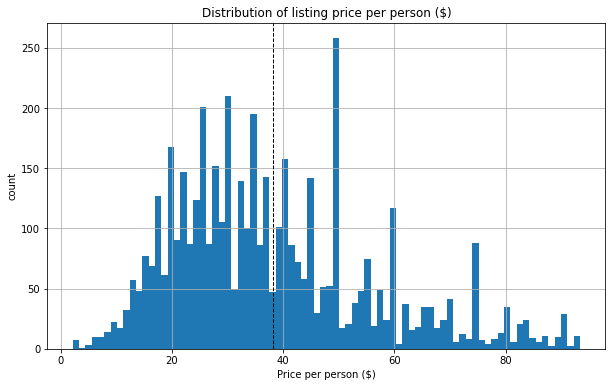

In [361]:
listings_df.price_per_person.hist(bins=80, figsize=(10,6))
plt.axvline(listings_df.price_per_person.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title("Distribution of listing price per person ($)")
plt.xlabel("Price per person ($)")
plt.ylabel("count")

From the dataset we can spot that rounded prices (30\\$, 40\\$, 50\\$ etc.) seem to be overrepresented. This might indicate that hosts prefer rounded prices instead of "uneven" prices. Besided that, the data seems to be right-skewed with a mean of around 38\\$ per night per person (see dashed line). The median is even lower at 35\\$ per night per person.

In [42]:
listings_df.price_per_person.describe()

count    4641.000000
mean       38.164593
std        18.074205
min         2.187500
25%        24.750000
50%        35.000000
75%        49.500000
max        93.333333
Name: price_per_person, dtype: float64

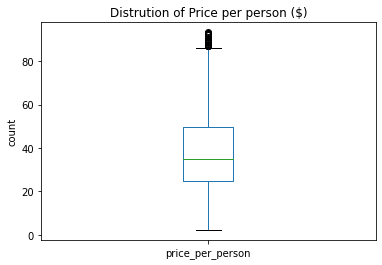

In [277]:
listings_df.price_per_person.plot(kind="box", title="Distrution of Price per person ($)",ylabel="count")

### 2. What neighborhoods are the most expensive/cheapest

In [280]:
# group listings by neighbourhood
vals_neighbourhood = listings_df[["neighbourhood_cleansed", "price_per_person"]].groupby("neighbourhood_cleansed")
vals_neighbourhood.describe()

price_per_person  \
                                                              count   
neighbourhood_cleansed                                                
Allach-Untermenzing                                            44.0   
Altstadt-Lehel                                                147.0   
Au-Haidhausen                                                 304.0   
Aubing-Lochhausen-Langwied                                     58.0   
Berg am Laim                                                   92.0   
Bogenhausen                                                   218.0   
Feldmoching-Hasenbergl                                         62.0   
Hadern                                                         48.0   
Laim                                                          147.0   
Ludwigsvorstadt-Isarvorstadt                                  509.0   
Maxvorstadt                                                   395.0   
Milbertshofen-Am Hart                                         171.0   
Moosach                                                       113.0   
Neuhausen-Nymphenburg                                         289.0   
Obergiesing                                                   168.0   
Pasing-Obermenzing                                            133.0   
Ramersdorf-Perlach                                            208.0   
Schwabing-Freimann                                            274.0   
Schwabing-West                                                333.0   
Schwanthalerhöhe                                              136.0   
Sendling                                                      166.0   
Sendling-Westpark                                             185.0   
Thalkirchen-Obersendling-Forstenried-Fürstenrie...            161.0   
Tudering-Riem                                                 157.0   
Untergiesing-Harlaching                                       123.0   

                                                                          \
                                                         mean        std   
neighbourhood_cleansed                                                     
Allach-Untermenzing                                 34.922754  19.252698   
Altstadt-Lehel                                      48.060285  17.694121   
Au-Haidhausen                                       39.851844  17.548212   
Aubing-Lochhausen-Langwied                          30.278161  14.085922   
Berg am Laim                                        35.805752  17.518721   
Bogenhausen                                         35.493471  17.574484   
Feldmoching-Hasenbergl                              29.501344  13.922418   
Hadern                                              33.883135  16.340625   
Laim                                                34.934508  17.592566   
Ludwigsvorstadt-Isarvorstadt                        43.588315  18.783940   
Maxvorstadt                                         41.228026  17.623814   
Milbertshofen-Am Hart                               33.974025  16.494065   
Moosach                                             39.626844  19.628497   
Neuhausen-Nymphenburg                               37.701493  17.834280   
Obergiesing                                         37.323193  18.920997   
Pasing-Obermenzing                                  36.169665  16.480897   
Ramersdorf-Perlach                                  34.542949  17.871073   
Schwabing-Freimann                                  39.179136  16.915241   
Schwabing-West                                      38.702370  18.663025   
Schwanthalerhöhe                                    40.318788  19.093724   
Sendling                                            37.759438  17.865590   
Sendling-Westpark                                   31.428861  16.918001   
Thalkirchen-Obersendling-Forstenried-Fürstenrie...  33.257901  16.755033   
Tudering-Riem                                       38.847607  17.726641   
Untergiesi

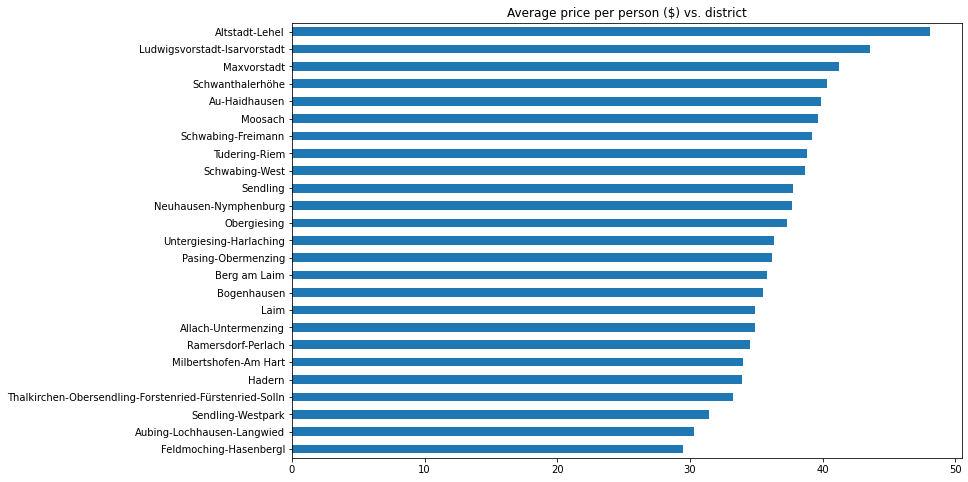

In [306]:
# plot average prices per person vs. the city district
vals_neighbourhood.mean().sort_values("price_per_person", ascending=True).plot.barh(title="Average price per person ($) vs. district", xlabel="", ylabel="Price per person ($)", legend=False, figsize=(12,8))

The most expensive areas in Munich seem to be 
- Altstadt-Lehel (48\\$ on avg.), 
- Ludwigsvorstadt-Isarvorstadt (44\\$), 
- Maxvorstadt (41\\$) and 
- Schwanthalerhöhe (40\\$).


Least expensive seem to be 
- Sendling-Westpark, 
- Aubing-Lochhausen and 
- Feldmoching-Hasenbergl (30\\$). 

This aligns well with the typical assumption that the city-center is often more expensive than the suburbs. Another reason might be that those regions tend to be close to the Oktoberfest area.

In [243]:
neighbourhood_dummies = pd.get_dummies(listings_df["neighbourhood_cleansed"])

In [244]:
neighbourhood_df = neighbourhood_dummies.join(listings_df['price_per_person'])

In [246]:
neighbourhood_corr = neighbourhood_df.corr()

In [249]:
neighbourhood_corr['price_per_person'].sort_values(ascending=False)

price_per_person                                          1.000000
Ludwigsvorstadt-Isarvorstadt                              0.105333
Altstadt-Lehel                                            0.099032
Maxvorstadt                                               0.051702
Au-Haidhausen                                             0.024718
Schwanthalerhöhe                                          0.020711
Schwabing-Freimann                                        0.014062
Moosach                                                   0.012782
Schwabing-West                                            0.008273
Tudering-Riem                                             0.007072
Sendling                                                 -0.004318
Neuhausen-Nymphenburg                                    -0.006603
Obergiesing                                              -0.009023
Untergiesing-Harlaching                                  -0.017091
Allach-Untermenzing                                      -0.01

In [52]:
path_to_file = "./munich.geojson"
gdf = gpd.read_file(path_to_file)
gdf

,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,...,SN_V2,SN_G,FK_S3,NUTS,RS_0,AGS_0,WSK,DEBKG_ID,destatis,geometry
0,6,4,1,091620000000,09162000,091620000000,München,Stadt,60,kreisfrei,...,00,000,R,DE212,091620000000,09162000,2004-12-31,DEBKGDL20000E06J,"{'RS': '091620000000', 'area': 310.7, 'populat...","POLYGON ((11.54637 48.22836, 11.58133 48.22981..."


In [86]:
locations = listings_df[["latitude","longitude","price_per_person"]]
locations.head()

,latitude,longitude,price_per_person
id,,,
97945,48.11492,11.48954,40.00
114695,48.12071,11.63758,19.00
127383,48.15199,11.56482,24.75
159634,48.13855,11.46586,26.00
170154,48.10814,11.52733,13.75


In [55]:
gdf["area"] = gdf.area
gdf['boundary'] = gdf.boundary
gdf['centroid'] = gdf.centroid
gdf['centroid']


C:\Users\Lenovo\Anaconda3\envs\munich_eda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\Anaconda3\envs\munich_eda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


0    POINT (11.54707 48.15311)
Name: centroid, dtype: geometry

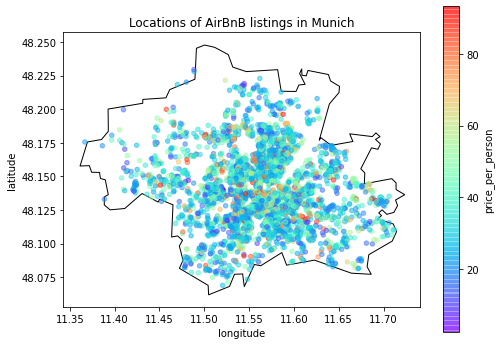

In [373]:
base = gdf.plot(color='white', edgecolor='black',figsize=(8,6))
locations.plot.scatter(ax=base, x="longitude", y="latitude", c="price_per_person", colormap="rainbow", alpha=0.5, )
plt.title("Locations of AirBnB listings in Munich");

### 3. During what time is a trip to Munich most/least expensive?

In [133]:
calendar_df.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,701005,2021-12-24,f,40.0,2,1125
1,199840,2021-12-24,f,59.0,1,780
2,199840,2021-12-25,t,59.0,1,780
3,199840,2021-12-26,t,49.0,1,780
4,199840,2021-12-27,t,49.0,1,780


In [157]:
seasonal_prices = calendar_df.groupby("date").mean()["price"]
seasonal_prices

date
2021-12-24    126.144573
2021-12-25    126.228875
2021-12-26    128.864838
2021-12-27    128.566680
2021-12-28    128.972968
                 ...    
2022-12-19    138.480977
2022-12-20    138.953544
2022-12-21    138.888466
2022-12-22    139.067681
2022-12-23    138.139167
Name: price, Length: 365, dtype: float64

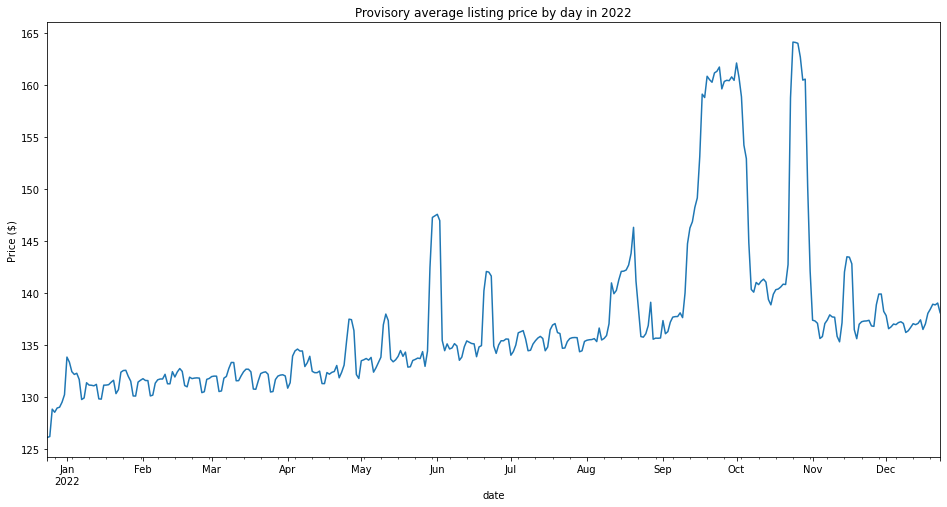

In [367]:
seasonal_prices.plot(figsize=(16,8), title="Provisory average listing price by day in 2022", ylabel="Price ($)");

Plotting the data we see the following:
- positive trend over the year, meaning increasing prices
- sharp increases end of September until beginning of October. 
    - price increas end of September can most likely be accounted for by famous Oktoberfest. It's Bierzelt-time!
    - no idea what's in Oktober. Educated guess would be the BAUMA, the world's leading exposition for construction machinery.
- some kind of seasonlity. First guess is different prices on weekdays and weekends

In [166]:
calendar_df['date'] = pd.to_datetime(calendar_df['date'])
calendar_df['weekday'] = calendar_df.date.dt.day_name()
calendar_df['month'] = calendar_df.date.dt.month

In [144]:
calendar_df.head()

,listing_id,date,available,price,minimum_nights,maximum_nights,weekday
0,701005,2021-12-24,f,40.0,2,1125,Friday
1,199840,2021-12-24,f,59.0,1,780,Friday
2,199840,2021-12-25,t,59.0,1,780,Saturday
3,199840,2021-12-26,t,49.0,1,780,Sunday
4,199840,2021-12-27,t,49.0,1,780,Monday


In [148]:
calendar_df.groupby('weekday').mean()['price']

weekday
Friday       135.898369
Monday       137.672230
Saturday     136.342353
Sunday       137.260478
Thursday     137.657131
Tuesday      137.728374
Wednesday    137.733111
Name: price, dtype: float64

It seems that Fridays are generally less expensive (by 2\\$) than remaining days.

In [160]:
january_prices = calendar_df[calendar_df.date < pd.to_datetime('2022-02-01')].groupby("date").mean()["price"]
january_prices

date
2021-12-24    126.144573
2021-12-25    126.228875
2021-12-26    128.864838
2021-12-27    128.566680
2021-12-28    128.972968
2021-12-29    129.052062
2021-12-30    129.533640
2021-12-31    130.252703
2022-01-01    133.870044
2022-01-02    133.383460
2022-01-03    132.464557
2022-01-04    132.203044
2022-01-05    132.314978
2022-01-06    131.718262
2022-01-07    129.789347
2022-01-08    129.941730
2022-01-09    131.403684
2022-01-10    131.181818
2022-01-11    131.159792
2022-01-12    131.110533
2022-01-13    131.248498
2022-01-14    129.852823
2022-01-15    129.828194
2022-01-16    131.169403
2022-01-17    131.177413
2022-01-18    131.216260
2022-01-19    131.448939
2022-01-20    131.642171
2022-01-21    130.356027
2022-01-22    130.748098
2022-01-23    132.417101
2022-01-24    132.577293
2022-01-25    132.601922
2022-01-26    132.018222
2022-01-27    131.555266
2022-01-28    130.132960
2022-01-29    130.123148
2022-01-30    131.464557
2022-01-31    131.646376
Name: price, dtype: 

Text(0, 0.5, 'Avg. price ($)')

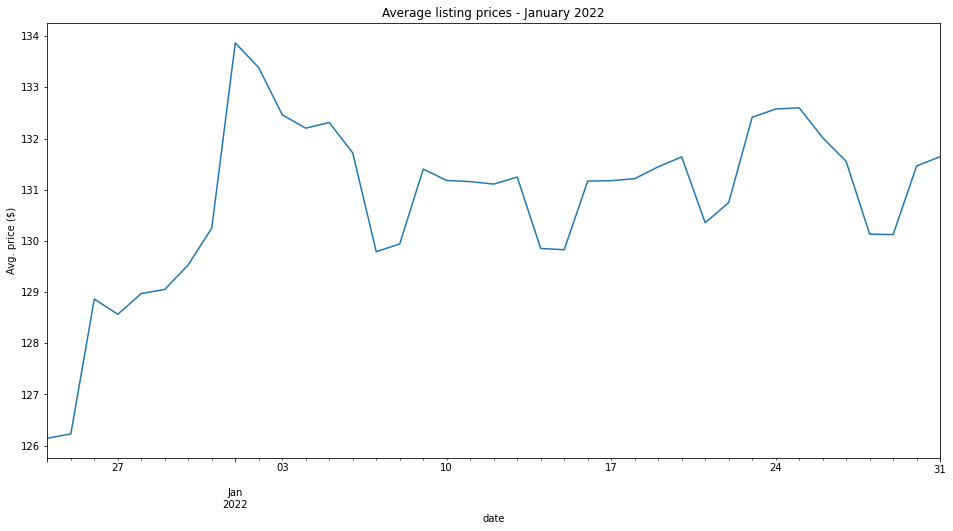

In [368]:
january_prices.plot(figsize=(16,8))
plt.title("Average listing prices - January 2022")
plt.ylabel("Avg. price ($)")

In [169]:
monthly_prices = calendar_df.groupby('month').mean()['price']
monthly_prices

month
1     131.411804
2     131.602852
3     131.931175
4     133.255854
5     135.165495
6     136.619457
7     135.450379
8     138.275382
9     150.365025
10    148.751398
11    138.026412
12    135.085412
Name: price, dtype: float64

In [173]:
yearly_yield = monthly_prices[12]/monthly_prices[1]
yearly_yield

1.0279549342037193

This results in a calculated 2.8% yearly price increase on AirBnB listings. This corresponds well to a typical inflation rate.

In [189]:
seasonal_prices.sort_values(ascending = False).nlargest(25)

date
2022-10-24    164.160392
2022-10-25    164.125751
2022-10-26    164.045054
2022-10-27    162.719063
2022-10-01    162.148779
2022-09-24    161.761714
2022-09-23    161.352823
2022-09-22    161.196235
2022-09-19    160.875050
2022-09-29    160.814978
2022-10-02    160.759511
2022-10-29    160.597117
2022-09-20    160.546055
2022-10-28    160.506408
2022-09-27    160.487385
2022-09-30    160.482179
2022-09-28    160.449139
2022-09-26    160.376652
2022-09-21    160.296155
2022-09-25    159.659592
2022-09-17    159.154385
2022-10-03    158.903684
2022-09-18    158.829796
2022-10-23    158.802563
2022-10-04    154.254505
Name: price, dtype: float64

In [123]:
calendar_df.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,701005,2021-12-24,f,40.0,2,1125
1,199840,2021-12-24,f,59.0,1,780
2,199840,2021-12-25,t,59.0,1,780
3,199840,2021-12-26,t,49.0,1,780
4,199840,2021-12-27,t,49.0,1,780


In [127]:
available_days = calendar_df[calendar_df.available == "t"].groupby("listing_id").count()["available"]

In [130]:
available_days

listing_id
97945        22
114695       52
127383        4
170154      162
179640      341
           ... 
53933449    365
53935376    191
53936793    365
53945865     65
53949583      7
Name: available, Length: 3716, dtype: int64

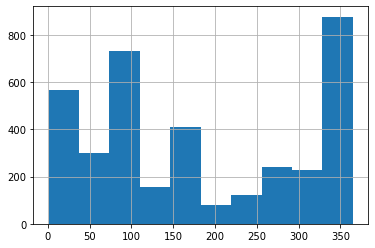

In [131]:
available_days.hist()

In [110]:
calendar_df.describe()

,listing_id,price,minimum_nights,maximum_nights
count,1.822810e+06,1.822810e+06,1.822810e+06,1.822810e+06
mean,3.116352e+07,1.371811e+02,9.093823e+00,3.870774e+06
std,1.583306e+07,3.898692e+02,3.144090e+01,9.108254e+07
min,9.794500e+04,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.966634e+07,5.500000e+01,1.000000e+00,3.000000e+01
50%,3.388064e+07,8.400000e+01,2.000000e+00,1.125000e+03
75%,4.411729e+07,1.300000e+02,5.000000e+00,1.125000e+03
max,5.394958e+07,1.080000e+04,1.000000e+03,2.147484e+09


### 4. What are the main amenities influencing the overall price of a listing?

In [202]:
amenities = listings_df.amenities
amenities.head()

id
97945     ["Room-darkening shades", "Long term stays all...
114695    ["Long term stays allowed", "Hangers", "Smoke ...
127383    ["Breakfast", "Hangers", "Smoke alarm", "Coffe...
159634    ["Room-darkening shades", "Long term stays all...
170154    ["Room-darkening shades", "Long term stays all...
Name: amenities, dtype: object

In [198]:
json.loads(amenities[97945])

['Room-darkening shades',
 'Long term stays allowed',
 'Hangers',
 'Coffee maker',
 'Hot water',
 'Kitchen',
 'Luggage dropoff allowed',
 'Carbon monoxide alarm',
 'Host greets you',
 'Bathtub',
 'Heating',
 'TV with standard cable',
 'Wifi',
 'Hair dryer',
 'Microwave',
 'Bed linens',
 'Dishes and silverware',
 'Oven',
 'Cooking basics',
 'Dishwasher',
 'Shampoo',
 'Children’s books and toys',
 'Cable TV',
 'Window guards',
 'Dedicated workspace',
 'Free street parking',
 'Refrigerator',
 'Stove',
 'Extra pillows and blankets',
 'Cleaning before checkout',
 'Patio or balcony',
 'Essentials']

In [203]:
amenities = amenities.apply(lambda x: json.loads(x))
amenities

id
97945       [Room-darkening shades, Long term stays allowe...
114695      [Long term stays allowed, Hangers, Smoke alarm...
127383      [Breakfast, Hangers, Smoke alarm, Coffee maker...
159634      [Room-darkening shades, Long term stays allowe...
170154      [Room-darkening shades, Long term stays allowe...
                                  ...                        
53933449    [Carbon monoxide alarm, Outdoor dining area, F...
53935376    [Carbon monoxide alarm, Indoor fireplace, Wifi...
53936793    [Room-darkening shades, Long term stays allowe...
53945865    [Children’s dinnerware, Room-darkening shades,...
53949583    [Room-darkening shades, Long term stays allowe...
Name: amenities, Length: 4641, dtype: object

In [206]:
amenities_matrix = pd.get_dummies(amenities.apply(pd.Series).stack()).sum(level=0)
amenities_matrix

,Bose sound system with Bluetooth and aux,- refrigerator,- stainless steel electric stove,-standard- body soap,-standard- conditioner,100% Bioprodukte shampoo,"100% Bioprodukte, feste Seife für Körper und Haare body soap","22"" HDTV with Amazon Prime Video, Netflix, standard cable","23"" HDTV with standard cable","23"" TV with standard cable",...,radio sound system,shared refrigerator,sonos sound system,vegane Bioprodukte body soap,verschiedene conditioner,wechselnd body soap,wechselnd conditioner,x body soap,xxx shampoo,you'll find a variety of care products from different brands body soap
id,,,,,,,,,,,,,,,,,,,,,
97945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
170154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53933449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53935376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53936793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [342]:
frequent_amenities = amenities_matrix.mean().sort_values(ascending=False).nlargest(10)
frequent_amenities

Wifi                       0.939009
Essentials                 0.921336
Kitchen                    0.883836
Smoke alarm                0.855388
Heating                    0.840517
Hair dryer                 0.783621
Long term stays allowed    0.773707
Hangers                    0.762931
Washer                     0.703448
Hot water                  0.697629
dtype: float64

Text(0.5, 0, 'Proportion (%)')

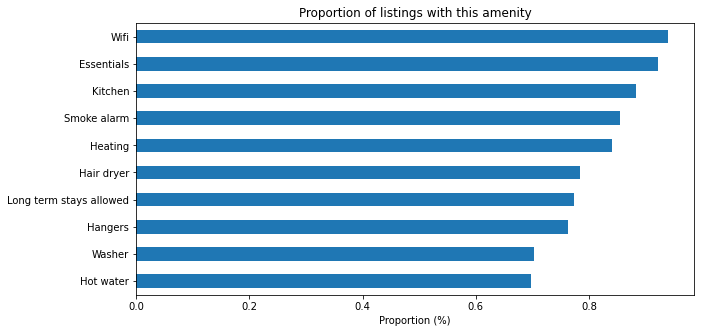

In [353]:
frequent_amenities.sort_values().plot.barh(figsize=(10,5))
plt.title("Proportion of listings with this amenity")
plt.xlabel("Proportion (%)")

In [219]:
amenities_df = amenities_matrix.join(listings_df[['price_per_person']])

In [220]:
amenities_df.head()

,Bose sound system with Bluetooth and aux,- refrigerator,- stainless steel electric stove,-standard- body soap,-standard- conditioner,100% Bioprodukte shampoo,"100% Bioprodukte, feste Seife für Körper und Haare body soap","22"" HDTV with Amazon Prime Video, Netflix, standard cable","23"" HDTV with standard cable","23"" TV with standard cable",...,shared refrigerator,sonos sound system,vegane Bioprodukte body soap,verschiedene conditioner,wechselnd body soap,wechselnd conditioner,x body soap,xxx shampoo,you'll find a variety of care products from different brands body soap,price_per_person
id,,,,,,,,,,,,,,,,,,,,,
97945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40.00
114695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19.00
127383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24.75
159634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26.00
170154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13.75


In [272]:
corr_matrix = amenities_df.corr()
corr_matrix

,Bose sound system with Bluetooth and aux,- refrigerator,- stainless steel electric stove,-standard- body soap,-standard- conditioner,100% Bioprodukte shampoo,"100% Bioprodukte, feste Seife für Körper und Haare body soap","22"" HDTV with Amazon Prime Video, Netflix, standard cable","23"" HDTV with standard cable","23"" TV with standard cable",...,shared refrigerator,sonos sound system,vegane Bioprodukte body soap,verschiedene conditioner,wechselnd body soap,wechselnd conditioner,x body soap,xxx shampoo,you'll find a variety of care products from different brands body soap,price_per_person
Bose sound system with Bluetooth and aux,1.000000,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000373,-0.000216,...,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.002572
- refrigerator,-0.000216,1.000000,1.000000,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000373,-0.000216,...,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,0.033983
- stainless steel electric stove,-0.000216,1.000000,1.000000,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000373,-0.000216,...,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,0.033983
-standard- body soap,-0.000216,-0.000216,-0.000216,1.000000,1.000000,-0.000216,-0.000216,-0.000216,-0.000373,-0.000216,...,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.016381
-standard- conditioner,-0.000216,-0.000216,-0.000216,1.000000,1.000000,-0.000216,-0.000216,-0.000216,-0.000373,-0.000216,...,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.016381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wechselnd conditioner,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000373,-0.000216,...,-0.000216,-0.000216,-0.000216,-0.000216,1.000000,1.000000,-0.000216,-0.000216,-0.000216,-0.013944
x body soap,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000373,-0.000216,...,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,1.000000,-0.000216,-0.000216,-0.007040
xxx shampoo,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000373,-0.000216,...,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,1.000000,-0.000216,-0.015163
you'll find a variety of care products from different brands body soap,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000373,-0.000216,...,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,1.000000,-0.016544


In [326]:
important_features = corr_matrix.price_per_person.sort_values(ascending=False).nlargest(11)[1:]
important_features

Security cameras on property                   0.094887
Elevator                                       0.091157
Stop the water while using me body soap        0.072864
Paid parking garage on premises – 79 spaces    0.072864
Gym                                            0.066347
43" HDTV                                       0.065903
Paid parking garage on premises                0.064861
Air conditioning                               0.058710
TV with standard cable                         0.057040
Cable TV                                       0.053778
Name: price_per_person, dtype: float64

Text(0.5, 0, 'Correlation coefficient')

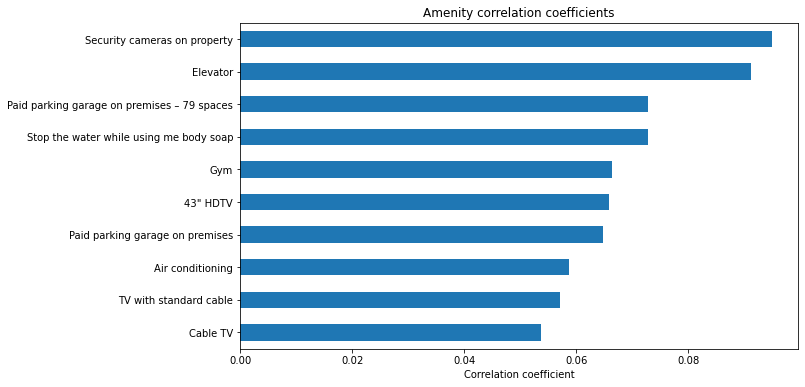

In [339]:
important_features.sort_values().plot.barh(title="Amenity correlation coefficients", figsize=(10,6))
plt.xlabel("Correlation coefficient", )

From the table above we see that people tend to favor safe houses (security camera, aafe) and well-equiped homes (elevator, gym, HDTV, air conditioning etc.). Nevertheless these conclusions need to be treated with care, as none of the amenities seem to have a significant effect on the price.